# **CORRELATION AND MULTICOLLINEARITY**

In the last lesson, I walked through the foundational steps of using linear regression to analyze KO’s excess stock return. I reviewed the types of variables used in the model, explored how to check correlations among them, built the regression model, and evaluated its performance using several diagnostic metrics and visual tools.

In this lesson, I take a deeper look at the relationships among variables—specifically, what happens when the exogenous variables in a regression model are highly correlated with each other. I explore how this affects the model, why it can be problematic, and introduce methods to reduce the impact of correlated predictors. I continue using KO’s excess return analysis as the working example throughout the discussion.


In [1]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams["figure.figsize"] = (12, 9)

In [2]:
# Download the dataset
data_set = pd.read_csv("fin_data_set.csv")

## **1. Expanding Independent Variables to Study Correlation**

To extend the KO excess return model, I add five additional exogenous variables (independent variables) with the goal of improving the model’s explanatory power. The new variables come from five major companies:

- Google  
- Bank of America  
- Walmart  
- General Electric  
- Starbucks  

Following the same methodology used in the previous lesson, I calculate each company’s **quarterly excess return** and include these new series in the regression dataset. With these additions, the model now includes a total of **eight independent variables** plus the dependent variable.

The full list of variables in the expanded model is:

- **Dependent Variable**
  - KO quarterly excess return (*KO_Q_EX_R*)

- **Independent Variables**
  - Dow 30 Index quarterly excess return (*Dow_Q_EX_R*)
  - Pepsi quarterly excess return (*Pepsi_Q_EX_R*)
  - KO quarterly revenue return (*REV_Q_R*)
  - Google quarterly excess return (*GOOG_Q_R*)
  - Bank of America quarterly excess return (*BAC_Q_R*)
  - Walmart quarterly excess return (*WMT_Q_R*)
  - General Electric quarterly excess return (*GE_Q_R*)
  - Starbucks quarterly excess return (*SBUX_Q_R*)

This expanded model allows me to analyze KO's excess return in the context of broader market movements and cross-company relationships across multiple industries.


## **2. Covariance and Correlation**

In finance, a key objective is to understand how two variables move relative to one another. A common question is: **How do two stock returns move together?** Two core metrics used to answer this are **covariance** and **correlation**.

Covariance measures the degree to which two variables move together. Its mathematical definition is:

$$
\mathrm{Cov}(X, Y) = E\left[(X - E[X])(Y - E[Y])\right]
$$

- A **positive** covariance means the two variables tend to move in the same direction.  
- A **negative** covariance means they tend to move in opposite directions.  
- A covariance of **0** means the variables are **linearly uncorrelated**.

A limitation of covariance is that its value depends on the scale of each variable. Because scaling can distort its magnitude, covariance alone is not always ideal for interpretation.

To address that issue, we often use **correlation**, which standardizes covariance by dividing it by the product of the variables’ standard deviations:

$$
\mathrm{Corr}(X, Y) = \frac{\mathrm{Cov}(X, Y)}{\sqrt{\mathrm{Var}(X)\,\mathrm{Var}(Y)}}
$$

Correlation has several advantages:

- Its value is always between **–1 and 1**.  
- Correlation **> 0** indicates a positive relationship.  
- Correlation **< 0** indicates a negative relationship.  
- A value of **1** indicates perfect positive correlation.  
- A value of **–1** indicates perfect negative correlation.  
- A value of **0** indicates linear independence.



## **3. Collinear Variables**

Most financial data comes from external sources, and we have no control over how it is generated. Because of this, many financial variables naturally move together in systematic ways. When two variables move together, we refer to this as **collinearity** or simply say the variables are **correlated**. When this occurs among more than two variables, the issue becomes **multicollinearity**.

Detecting multicollinearity is an important step in regression analysis, and one of the most effective tools for this is a **correlation matrix**. A correlation matrix displays the pairwise correlations among all variables in the model.

To illustrate this, I examine the KO excess return model. Figure 1 shows the correlation matrix for both the dependent variable and all independent variables included in the regression. The correlations appear in the upper-right triangle of the matrix, while the diagonal values are always 1 because each variable is perfectly correlated with itself. The lower-left triangle contains the same information as the upper-right triangle, just mirrored.

This matrix allows us to quickly identify which variables are strongly correlated with others—an important step in assessing whether multicollinearity may affect the regression results.


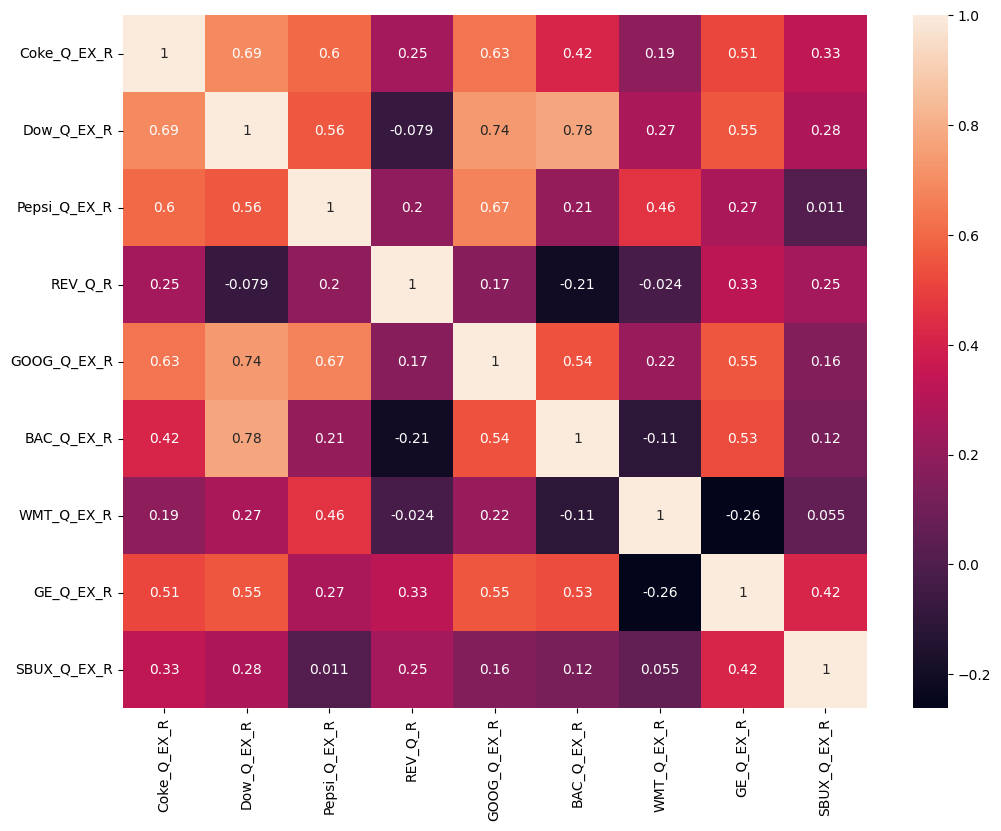

In [3]:
# Correlation plot of all the variables
data = data_set[
    [
        "Coke_Q_EX_R",
        "Dow_Q_EX_R",
        "Pepsi_Q_EX_R",
        "REV_Q_R",
        "GOOG_Q_EX_R",
        "BAC_Q_EX_R",
        "WMT_Q_EX_R",
        "GE_Q_EX_R",
        "SBUX_Q_EX_R",
    ]
]
c = data.corr()
sns.heatmap(c, annot=True)
plt.show()

### **3.1 Dependent Variable and Independent Variables**

Looking at the correlation matrix, KO’s excess return shows fairly strong positive correlations with three independent variables: the Dow 30 Index excess return, Pepsi’s excess return, and Google’s excess return. This indicates that these three variables are particularly effective at explaining the variation in KO’s excess return, making them strong candidates in the regression model.


### **3.2 Low-Correlated Independent Variables**

Turning attention to the independent variables themselves, KO’s revenue growth, Walmart’s excess return, and Starbucks’ excess return all display low correlation with the other independent variables. At the same time, these three variables also have low correlation with the dependent variable, KO’s excess return. This suggests that they are not strongly related to the movements in KO’s excess return and may contribute less explanatory power to the regression model.


### **3.3 High-Correlated Independent Variables**

In the correlation matrix, the Dow 30 Index excess return shows a high correlation with both Google’s excess return and Bank of America’s excess return. In addition, Google’s excess return is strongly correlated with Pepsi’s excess return. With these four independent variables being fairly highly correlated, it raises an important question: will this create issues for the regression model?

When several independent variables are strongly correlated with each other, the model may suffer from multicollinearity. This can inflate the variance of coefficient estimates, make coefficients unstable or counterintuitive, and reduce the ability to interpret the individual contribution of each variable. I explore these potential issues in more detail in the sections that follow.


## **4. Impact of Multicollinearity in Regression Model**

1. When independent variables are highly correlated, the variances, standard errors, and covariances of the coefficient estimates can become large. As a result, the coefficient estimates become less precise, and their confidence intervals widen.

2. Large standard errors also make the coefficients less likely to appear statistically significant, even if the underlying relationships are meaningful. The overall model fit, reflected in metrics like $R^2$ and adjusted $R^2$, may still be strong, but collinearity makes it difficult to distinguish the individual contribution of each correlated variable.

3. Although it becomes harder to isolate the effect of each independent variable, the model can still perform well as a forecasting tool—provided that the new data exhibits a similar pattern of collinearity to the dataset used to train the model.


With the expanded set of variables in place, I now run the updated regression model to observe how multicollinearity affects the results. This allows me to compare the new coefficient estimates, standard errors, and significance levels against the earlier model and


**Figure 2: KO Excess Return Regression Model with Eight Independent Variables**


In [4]:
# KO Excess Return Regression Model with Eight Independent Variables
model_1 = smf.ols(
    "Coke_Q_EX_R ~ Dow_Q_EX_R + Pepsi_Q_EX_R + REV_Q_R + GOOG_Q_EX_R + BAC_Q_EX_R + WMT_Q_EX_R + GE_Q_EX_R + SBUX_Q_EX_R",
    data=data_set,
).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     2.798
Date:                Fri, 05 Dec 2025   Prob (F-statistic):             0.0482
Time:                        19:02:31   Log-Likelihood:                 39.396
No. Observations:                  22   AIC:                            -60.79
Df Residuals:                      13   BIC:                            -50.97
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0059      0.017     -0.337      0.742      -0.043       0.032
Dow_Q_EX_R       0.7091      0.471      1.504      0.156      -0.309       1.727
Pepsi_Q_EX_R     0.2686      0.267      1.005      0.333      -0.309       0.846
REV_Q_R          0.1007      0.121      0.834      0.419      -0.160       0.362
GOOG_Q_EX_R      0.0233      0.208      0.112      0.912      -0.425       0.472
BAC_Q_EX_R      -0.0762      0.156     -0.487      0.634      -0.414       0.262
WMT_Q_EX_R      -0.1313      0.213     -0.617      0.548      -0.591       0.328
GE_Q_EX_R       -0.0040      0.106     -0.037      0.971      -0.234       0.226
SBUX_Q_EX_R      0.0824      0.135      0.608      0.554      -0.210       0.375
==============================================================================
Omnibus:                        1.980   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.638
Skew:                          -0.628   Prob(JB):                        0.441
Kurtosis:                       2.543   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# Parameters with high precision
model_1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.005859,0.017409,-0.336544,0.741832,-0.043469,0.031751
Dow_Q_EX_R,0.709085,0.471371,1.504303,0.156406,-0.309250,1.727419
Pepsi_Q_EX_R,0.268625,0.267324,1.004868,0.333299,-0.308893,0.846144
REV_Q_R,0.100740,0.120734,0.834399,0.419126,-0.160090,0.361570
GOOG_Q_EX_R,0.023328,0.207589,0.112377,0.912241,-0.425141,0.471798
BAC_Q_EX_R,-0.076156,0.156360,-0.487054,0.634329,-0.413950,0.261639
WMT_Q_EX_R,-0.131313,0.212743,-0.617238,0.547737,-0.590916,0.328290
GE_Q_EX_R,-0.003975,0.106396,-0.037365,0.970762,-0.233830,0.225879
SBUX_Q_EX_R,0.082359,0.135423,0.608162,0.553557,-0.210205,0.374923


From the expanded model results, none of the independent variables are statistically significant—their p-values all exceed 0.05. Even the Dow 30 Index excess return, which was significant in the Lesson 1 model, is no longer significant here. This shift is a clear sign of multicollinearity: the shared information among correlated variables inflates standard errors and weakens individual significance.

As expected, the model’s $R^2$ increased from 0.604 in Lesson 1 to 0.633 in the expanded model. Adding more independent variables almost always increases $R^2$. However, the adjusted $R^2$ tells a different story. It drops substantially from 0.538 to 0.407, indicating that the additional variables do not provide meaningful explanatory value once the penalty for model complexity is applied.

This comparison shows how multicollinearity can reduce interpretability and statistical clarity, even when the overall fit appears to improve.


## **5. Methods to Address Multicollinearity**

**Method 1**

One way to reduce the impact of multicollinearity is to drop independent variables that have very high pairwise correlation. Correlation values between 0.8 and 0.9 are typically considered high. By removing one variable from a highly correlated pair and re-running the regression, we can check whether the model improves. The drawback of this approach is that it evaluates variables only two at a time. It does not address cases where several variables are jointly correlated, so correlation alone may not fully reveal multicollinearity in the model.

**Method 2**

Another approach is to reframe one of the independent variables as a dependent variable and regress it on the remaining independent variables. This helps determine whether any independent variable can be substantially explained by the others. If an independent variable is highly predictable from the rest, it contributes to multicollinearity.

Using the KO excess return model as an example, suppose we temporarily treat the Dow 30 Index excess return as the dependent variable and regress it against all the remaining independent variables. This allows us to assess how much of the Dow’s excess return can be explained by the other predictors.  

**Figure 3: Regression Model to Check Multicollinearity Among Independent Variables**


In [6]:
# Regression model to check multicollinearity among independent variables
model_dow = smf.ols(
    "Dow_Q_EX_R ~ Pepsi_Q_EX_R + REV_Q_R + GOOG_Q_EX_R + BAC_Q_EX_R + WMT_Q_EX_R + GE_Q_EX_R + SBUX_Q_EX_R",
    data=data_set,
).fit()
model_dow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Dow_Q_EX_R   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     11.91
Date:                Fri, 05 Dec 2025   Prob (F-statistic):           6.13e-05
Time:                        19:02:31   Log-Likelihood:                 51.064
No. Observations:                  22   AIC:                            -86.13
Df Residuals:                      14   BIC:                            -77.40
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0061      0.010     -0.625      0.542      -0.027       0.015
Pepsi_Q_EX_R     0.1892      0.143      1.324      0.207      -0.117       0.496
REV_Q_R         -0.0605      0.067     -0.910      0.378      -0.203       0.082
GOOG_Q_EX_R      0.0977      0.115      0.851      0.409      -0.148       0.344
BAC_Q_EX_R       0.2319      0.063      3.658      0.003       0.096       0.368
WMT_Q_EX_R       0.1898      0.109      1.734      0.105      -0.045       0.425
GE_Q_EX_R        0.0570      0.058      0.977      0.345      -0.068       0.182
SBUX_Q_EX_R      0.0800      0.074      1.084      0.297      -0.078       0.238
==============================================================================
Omnibus:                        0.530   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.588
Skew:                          -0.043   Prob(JB):                        0.745
Kurtosis:                       2.204   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Parameters with 6 significant digits
model_1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.005859,0.017409,-0.336544,0.741832,-0.043469,0.031751
Dow_Q_EX_R,0.709085,0.471371,1.504303,0.156406,-0.309250,1.727419
Pepsi_Q_EX_R,0.268625,0.267324,1.004868,0.333299,-0.308893,0.846144
REV_Q_R,0.100740,0.120734,0.834399,0.419126,-0.160090,0.361570
GOOG_Q_EX_R,0.023328,0.207589,0.112377,0.912241,-0.425141,0.471798
BAC_Q_EX_R,-0.076156,0.156360,-0.487054,0.634329,-0.413950,0.261639
WMT_Q_EX_R,-0.131313,0.212743,-0.617238,0.547737,-0.590916,0.328290
GE_Q_EX_R,-0.003975,0.106396,-0.037365,0.970762,-0.233830,0.225879
SBUX_Q_EX_R,0.082359,0.135423,0.608162,0.553557,-0.210205,0.374923


Figure 4 shows the regression results from treating the Dow 30 Index excess return as the dependent variable. Both the $R^2$ and adjusted $R^2$ values are high, indicating that most of the variation in the Dow’s excess return can be explained by the remaining independent variables. This confirms that the Dow variable shares a substantial amount of information with the others—an indicator of multicollinearity.

To measure this formally, we use the **variance inflation factor (VIF)**. The VIF quantifies how much the variance of a coefficient is inflated due to multicollinearity. The formula is:

$$
\text{VIF} = \frac{1}{1 - R^2}
$$

Most statistical software will compute VIF values automatically. The scale works as follows:

- If $R^2 = 0$, then VIF = 1, meaning no multicollinearity.
- Higher VIF values indicate increasing levels of multicollinearity.
- A VIF between 1 and 5 suggests no serious multicollinearity issues.
- A VIF above 5 indicates severe multicollinearity.

For any independent variable with a high VIF, it’s useful to estimate the regression model both with and without that variable and compare the results. This helps determine whether removing the variable improves model stability and interpretability.


Next, I display the VIF values for all independent variables in the model. This allows me to compare the degree of multicollinearity across predictors and identify which variables have inflated variance due to shared information with the others.


In [8]:
labels = [
    "Intercept",
    "Dow_Q_EX_R",
    "Pepsi_Q_EX_R",
    "REV_Q_R",
    "GOOG_Q_EX_R",
    "BAC_Q_EX_R",
    "WMT_Q_EX_R",
    "GE_Q_EX_R",
    "SBUX_Q_EX_R",
]

variables = model_1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

pd.DataFrame(vif[1:], labels[1:], columns=["VIF"])

,VIF
Dow_Q_EX_R,6.957440
Pepsi_Q_EX_R,2.748897
REV_Q_R,1.612413
GOOG_Q_EX_R,3.241519
BAC_Q_EX_R,4.269485
WMT_Q_EX_R,2.184550
GE_Q_EX_R,3.096814
SBUX_Q_EX_R,1.511017


From the VIF results, the Dow 30 Index excess return stands out with a VIF value greater than 5. This indicates a severe multicollinearity issue. Because this variable shares a substantial amount of information with other predictors, it may distort coefficient estimates and reduce the model’s interpretability. As a result, it’s important to examine this variable more closely and consider removing it from the model to improve stability and clarity.


**Method 3**

The third method for addressing multicollinearity is **principal component analysis (PCA)**. PCA reduces the dimensionality of the dataset by transforming correlated variables into a smaller set of uncorrelated components. These components can then be used in a regression model to eliminate the instability caused by highly correlated predictors.

Beyond helping with multicollinearity, PCA is widely used across finance—for portfolio construction, risk factor modeling, interest rate term structure analysis, and more. Because of its importance and broad applicability, I dedicate the next lesson entirely to principal component analysis.


## **6. Conclusion**

In this lesson, I introduced covariance and correlation as tools for measuring the relationship between two variables. I then explained collinearity and multicollinearity, and demonstrated how a correlation matrix can be used to detect their presence among the independent variables of a regression model. When multicollinearity exists, coefficient estimates become less precise and often lose statistical significance.

To address this issue, I outlined three mitigation methods:  
1. Examine pairwise correlations among independent variables and remove one when the correlation exceeds 0.8.  
2. Use the variance inflation factor (VIF) to identify variables with VIF values above 5.  
3. Apply principal component analysis (PCA) to extract uncorrelated components from correlated predictors.

In the next lesson, I continue exploring strategies to reduce multicollinearity, with a focus on using principal component analysis as a more robust solution.
